# Le concept de phaseur

## Onde imaginaire et partie réelle

On peut représenter l'onde complexe $t\mapsto e^{i.\omega.t}$ (notée en bref $t\mapsto e^{i.\omega.t}$$e^{i.\omega.\bullet}$) dans le plan complexe (vision phaseur/Fresnel) ou la projeter sur les réels pour obtenir un cosinus.


In [27]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=22,10

from numpy import pi, real, imag, cos, sin, exp, arange

In [66]:

def plot_cplx(s, tps=0, t=None ):
    if t is None:
        Te=0.01
        t=arange(-1.1,1.2,Te)
    else:
        Te=t[1]-t[0]

    
    fig = plt.figure(figsize=plt.figaspect(1.))
    axcpl=fig.add_subplot(221)
    axcpl.set_xlabel(f'Réel')
    axcpl.set_ylabel(f'Imag')
    axcpl.set_title(f'Plan Laplace')
    axcpl.grid("on")
    
    aximag=fig.add_subplot(222)
    aximag.set_xlabel(f't')
    aximag.set_ylabel(f'Imaginaire')
    aximag.set_title(f'Projection sur imaginaire')
    aximag.grid("on")
    
    axreel=fig.add_subplot(223)
    axreel.set_xlabel(f't')
    axreel.set_ylabel(f'Réel')
    axreel.set_title(f'Projection sur réels')
    axreel.grid("on")
    
    ax3d = fig.add_subplot(224,projection='3d')
    ax3d.set_xlabel(f't')
    ax3d.set_zlabel(f'Réel')
    ax3d.set_ylabel(f'Imaginaire')
    ax3d.set_title(f'Onde complexe 3d')
    
    sig=s(t)
    axcpl.plot(real(sig),imag(sig))
    axcpl.plot(real(s(tps)),imag(s(tps)),'o')
    aximag.plot(t,imag(sig))
    aximag.plot(tps,imag(s(tps)),'o')
    axreel.plot(t,real(sig))
    axreel.plot(tps,real(s(tps)),'o')
    ax3d.plot(t,imag(sig),real(sig))
    ax3d.plot(tps,imag(s(tps)),real(s(tps)),'o')
    
def plot_onde_pure(tps=0,w=2*pi):
    onde = lambda t : exp(1j*w*t)
    tlast = min(100,2.2*pi/w)
    t=arange(0,tlast,tlast/1000)
    plot_cplx(onde,t=t,tps=tps)
    
#plot_cplx(lambda t : onde(w,t),t=t)
_ = interact(plot_onde_pure, tps=(t[0],t[-1],0.1), w=(0,4*pi,pi/8))

interactive(children=(FloatSlider(value=0.0, description='tps', max=1.09), FloatSlider(value=6.283185307179586…

Un phaseur $z$ est un nombre complexe qui va être multiplié à l'onde complexe $e^{i\omega\bullet}$

En représentation polaire $z=\rho.e^{i\varphi}$, et dans ce cas :
   - le module $\rho$ aura un effet d'amplification de l'onde
   - l'argument $\varphi$ aura un effet de rotation d'un ampgle $\varphi$ radians. L'onde multipliée aura ainsi un déphasage de $\varphi$ par rapport à l'onde de base  $e^{i\omega\bullet}$

In [69]:
def plot_onde_phaseur(tps=0,w=2*pi,rho=1,phi=0):
    onde = lambda t : exp(1j*w*t)
    onde_phasee = lambda t: onde(t)*rho*exp(1j*phi)
    
    tlast = min(100,2.2*pi/w)
    t=arange(0,tlast,tlast/1000)
    plot_cplx(onde_phasee,t=t,tps=tps)
    
#plot_cplx(lambda t : onde(w,t),t=t)
_ = interact(plot_onde_phaseur, tps=(t[0],t[-1],0.1), w=(0,4*pi,pi/8), rho = (0,2,0.1), phi = (-1.125*pi,1.125*pi,pi/8))

interactive(children=(FloatSlider(value=0.0, description='tps', max=1.09), FloatSlider(value=6.283185307179586…

Le phaseur appelé $\vec{I}$ pour **In phase** (avec le cosinus) est celui qui permet d'obtenir un **cosinus en partie réelle**.

Le phaseur appelé $\vec{Q}$ pour **Quadrature** (avec le cosinus) est celui qui permet d'obtenir un **sinus en partie réelle**.


In [4]:
def IQ(I=1,Q=1,w=2*np.pi):
    fig,ax = plt.subplots(1,2)
    ax1=ax[0]
    ax2=ax[1]
    t=np.arange(-1.1*np.pi/w,1.2*np.pi/w,0.01)
    N0 = int(1.1*np.pi/w / 0.01)
    s = I*np.cos(w*t)+Q*np.sin(w*t)
    ax1.plot(t,I*np.cos(w*t),
             t,Q*np.sin(w*t),
             t,s)
    ax1.set_ylim(-3.4,4.4)
    minid = s.argmax()
    ax1.legend(["Inphase = I.cos(w.t)",
                "Quadrature=Q.sin(w.t)",
                "I.cos(w.t)+Q.sin(w.t)"],
              loc = "lower left")
    ax1.plot(t[minid],s[minid],'+')
    ax1.plot((0,t[minid]),(s[minid],s[minid]),'o-')
    ax1.text(t[minid]+0.05,s[minid],"A="+s[minid].__str__()[:4])
    ax1.text(t[minid]/2,s[minid]+0.3,r"$\varphi$ ="+(-t[minid]/2/np.pi*w*360).__str__()[:4])
    ax1.grid("on")
    sc= np.exp(1j*w*t)
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    ax2.grid("on")
    ax2.plot([0,I],[0,0],[0,0],[0,-Q],[0,I],[0,-Q])
    ax2.plot(I,-Q,'+')
    Nd = min(N0,minid)
    Nf = max(N0,minid)+1
    ax2.plot(np.real(sc[Nd:Nf]),-np.imag(sc[Nd:Nf]),'-o')
    ax2.text(I+0.05,-Q-0.05,"A="+s[minid].__str__()[:4])
    ax2.text(1.1*np.real(sc[int((Nd+Nf)/2)]),-1.1*np.imag(sc[int((Nd+Nf)/2)]),r"$\varphi$ ="+(-t[minid]/2/np.pi*w*360).__str__()[:4])
    ax2.plot(np.real(sc),np.imag(sc),'-.k')
    ax2.quiver([0,0],[0,0],[0,1],[-1,0])
    ax2.text(0.1,0.1,r"$\vec{I}$")
    ax2.text(-0.2,-0.1,r"$\vec{Q}$")
    
_ = interact(IQ, I=(-3,3,0.1), Q=(-3,3,0.1), w=fixed(2*np.pi))

interactive(children=(FloatSlider(value=1.0, description='I', max=3.0, min=-3.0), FloatSlider(value=1.0, descr…

()

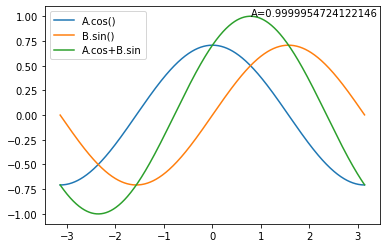

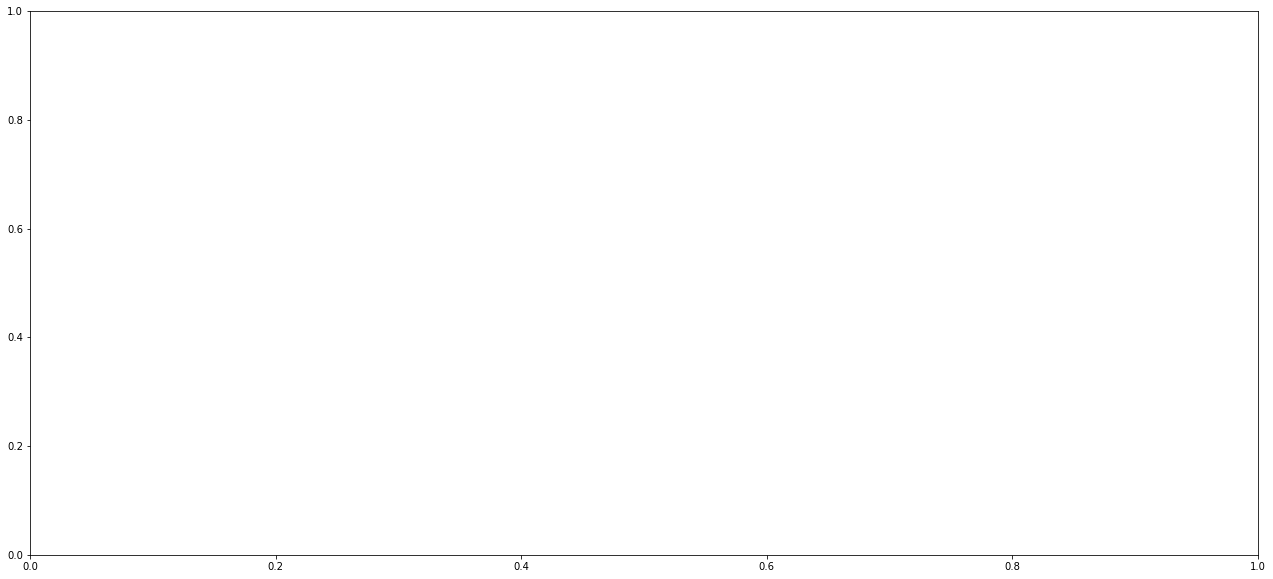

In [34]:
fig,ax = plt.subplots()

Signature:
ax.set(
    *,
    adjustable=<UNSET>,
    agg_filter=<UNSET>,
    alpha=<UNSET>,
    anchor=<UNSET>,
    animated=<UNSET>,
    aspect=<UNSET>,
    autoscale_on=<UNSET>,
    autoscalex_on=<UNSET>,
    autoscaley_on=<UNSET>,
    axes_locator=<UNSET>,
    axisbelow=<UNSET>,
    box_aspect=<UNSET>,
    clip_box=<UNSET>,
    clip_on=<UNSET>,
    clip_path=<UNSET>,
    facecolor=<UNSET>,
    frame_on=<UNSET>,
    gid=<UNSET>,
    in_layout=<UNSET>,
    label=<UNSET>,
    navigate=<UNSET>,
    path_effects=<UNSET>,
    picker=<UNSET>,
    position=<UNSET>,
    prop_cycle=<UNSET>,
    rasterization_zorder=<UNSET>,
    rasterized=<UNSET>,
    sketch_params=<UNSET>,
    snap=<UNSET>,
    subplotspec=<UNSET>,
    title=<UNSET>,
    transform=<UNSET>,
    url=<UNSET>,
    visible=<UNSET>,
    xbound=<UNSET>,
    xlabel=<UNSET>,
    xlim=<UNSET>,
    xmargin=<UNSET>,
    xscale=<UNSET>,
    xticklabels=<UNSET>,
    xticks=<UNSET>,
    ybound=<UNSET>,
    ylabel=<UNSET>,
    ylim=<UNSET>

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


def affine_combination(pair, t):
    """Return intermediate point between two points."""
    x0, x1 = np.asarray(pair)
    return (1 - t) * x0 + t * x1


def casteljau_step(points, t):
    """One step of De Casteljau's algorithm.

    Takes a list of points.
    Returns a list of intermediate points.

    """
    return [affine_combination(pair, t)
            for pair in zip(points[:-1], points[1:])]


def plot_casteljau(points, t, ax=None):
    """Plot steps of De Casteljau's algorithm.

    t is supposed to be between 0 and 1.

    """
    if len(points) < 2:
        raise ValueError('We need at least two points')
    if ax is None:
        ax = plt.gca()
    ax.set_title(f'Bézier curve of degree {len(points) - 1}; t = {t:1.2f}')
    while len(points) >= 2:
        ax.plot(*np.asarray(points).T)
        points = casteljau_step(points, t)
        ax.scatter(*np.asarray(points).T)
    ax.axis('equal')
    result, = points
    return result


def create_animation(points, frames, ax=None, **kwargs):
    """Create matplotlib animation for De Casteljau's algorithm.

    ``**kwargs`` are passed to ``FuncAnimation()``.

    """
    if ax is None:
        ax = plt.gca()
    partial_curve = []

    def animation_func(t):
        ax.clear()
        if partial_curve:
            ax.plot(*np.asarray(partial_curve).T, '.', c='lightgrey')
        point = plot_casteljau(points, t, ax=ax)
        ax.scatter(*np.asarray(points).T, marker='x', c='black')
        partial_curve.append(point)

    times = np.linspace(0, 1, frames)
    return FuncAnimation(ax.figure, animation_func, frames=times, **kwargs)
